In [37]:
import pandas as pd
import numpy as np

In [38]:
review = pd.read_csv('archive/googleplaystore_user_reviews.csv')
review.shape

(64295, 5)

In [39]:
app = pd.read_csv('archive/googleplaystore.csv')
app.shape

(10841, 13)

In [40]:
review = review.dropna()
app = app.dropna()

review.shape, app.shape

((37427, 5), (9360, 13))

In [41]:
review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [42]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Merge DataFrames
First, we need to merge the review and app dataframes based on the App column to align the reviews with the respective app details.

In [43]:
review_app = pd.merge(review, app, on='App', how='inner')
review_app.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


#### Clean Data
Check for missing values, incorrect data types, and perform necessary transformations (like converting installation numbers to a numerical format).

In [44]:
review_app['Installs'] = review_app['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
review_app.head()

C:\Users\zhiai\AppData\Local\Temp\ipykernel_27016\436185749.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  review_app['Installs'] = review_app['Installs'].str.replace('+', '').str.replace(',', '').astype(int)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


#### Summary Statistics
Provide summary statistics (mean, median, mode, etc.) for ratings, sentiment polarity, and installations.

In [45]:
# Summary statistics for numerical columns
summary_stats = review_app[['Rating', 'Sentiment_Polarity', 'Installs']].describe()
summary_stats

,Rating,Sentiment_Polarity,Installs
count,72566.000000,72566.000000,7.256600e+04
mean,4.333641,0.157187,7.626457e+07
std,0.280750,0.332585,1.878470e+08
min,2.600000,-1.000000,1.000000e+03
25%,4.200000,0.000000,1.000000e+06
50%,4.400000,0.129167,1.000000e+07
75%,4.500000,0.355625,1.000000e+08
max,4.900000,1.000000,1.000000e+09


### Distribution Visualization

Plot histograms or boxplots to visualize the distributions of sentiment scores, ratings, and installations.

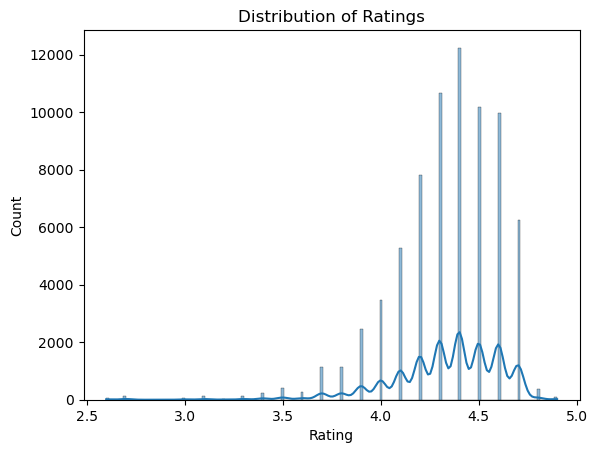

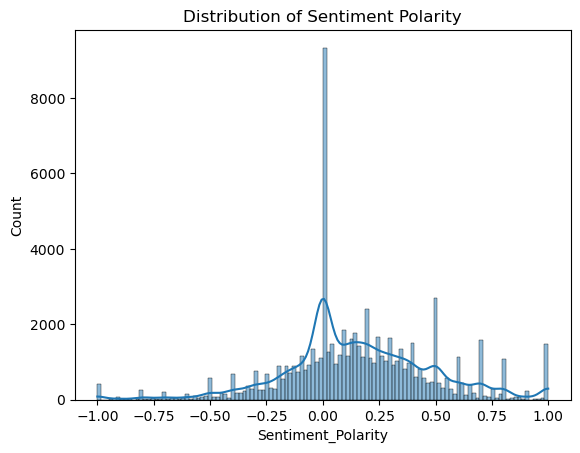

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(review_app['Rating'], kde=True)
plt.title('Distribution of Ratings')
plt.show()

sns.histplot(review_app['Sentiment_Polarity'], kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.show()

#### Correlation 

Calculate the correlation matrix to explore the relationships between sentiment polarity, ratings, and installations.

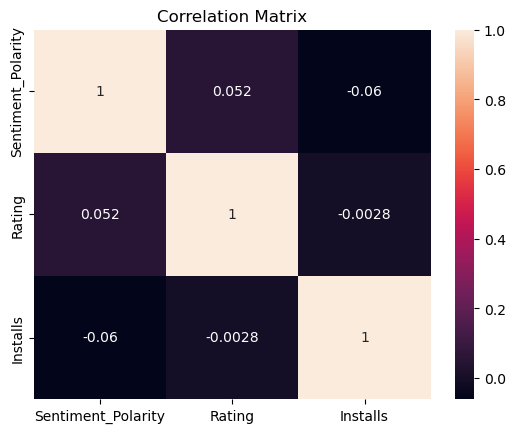

In [47]:
# Correlation matrix
correlation_matrix = review_app[['Sentiment_Polarity', 'Rating', 'Installs']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### Regression Analysis

#### Linear Regression
Perform regression analysis to determine the impact of sentiment polarity and installations on app ratings.

In [48]:
import statsmodels.api as sm

# Regression model
X = review_app[['Sentiment_Polarity', 'Installs']]  # Predictor variables
y = review_app['Rating']  # Response variable
X = sm.add_constant(X)  # adding a constant

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     98.51
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.89e-43
Time:                        02:56:32   Log-Likelihood:                -10688.
No. Observations:               72566   AIC:                         2.138e+04
Df Residuals:                   72563   BIC:                         2.141e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.3267      0